# KURELLA BHARGAV SRI SAI
# Task 01 - Prediction using Supervised ML
Prediction of percentage of score of an student based on the no. of study hours.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data set

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

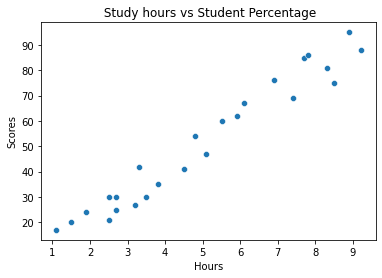

In [8]:
sns.scatterplot(data=df, x='Hours', y='Scores')
plt.title(" Study hours vs Student Percentage")
plt.show()

From the above graph, it is observed that there is a positive linear relationship between number of study hours and student score

In [ ]:
sns.boxplot(df['Hours'])
plt.show()

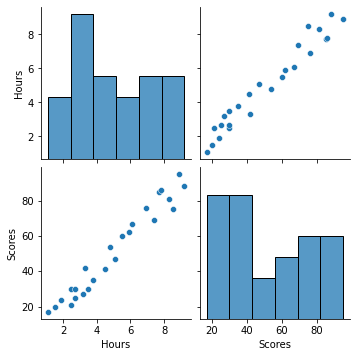

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
X=df['Hours']
y=df['Scores']
X.shape, y.shape

((25,), (25,))

In [12]:
X=np.array(X)
y=np.array(y)

# Splitting the data into training  and testing sets.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18,), (7,), (18,), (7,))

In [15]:
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train, y_train)

array([[-0.88998953],
       [ 1.32509552],
       [ 0.217553  ],
       [-1.52287097],
       [-0.65265899],
       [-0.45488354],
       [ 1.56242606],
       [ 0.77132426],
       [-0.17799791],
       [-0.69221408],
       [ 0.45488354],
       [ 1.68109133],
       [ 1.12732007],
       [-0.96909971],
       [-0.57354881],
       [-1.20643025],
       [ 0.96909971],
       [-0.96909971]])

# Model Training

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print('Model Intercept:', model.intercept_)
print("Model Coefficient:", model.coef_)

Model Intercept: [1.10782254]
Model Coefficient: [[10.03433439]]


# Prediction

In [19]:
ypred_test=model.predict(X_test)
ypred_train=model.predict(X_train)
print("Predicted test values", ypred_test)

Predicted test values [[86.39966487]
 [78.37219735]
 [49.27262762]
 [52.28292794]
 [16.15932413]
 [28.2005254 ]
 [60.31039545]]


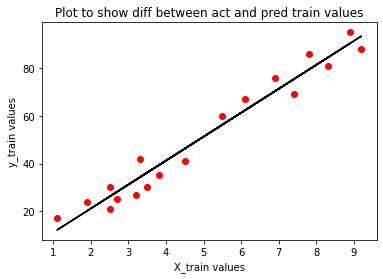

In [20]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, ypred_train, color='black')

plt.title("Plot to show diff between act and pred train values")
plt.xlabel("X_train values")
plt.ylabel("y_train values")
plt.show()

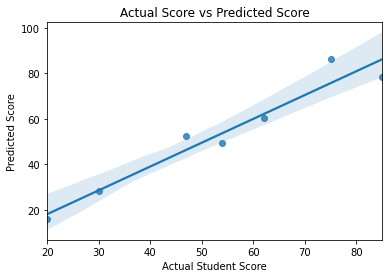

In [21]:
# Plotting the regression line
sns.regplot(x=y_test, y=ypred_test)
plt.xlabel("Actual Student Score")
plt.ylabel("Predicted Score")
plt.title("Actual Score vs Predicted Score")
plt.show()

# Evaluation
# Mean absolute error is 5% and prediction accuracy (r2_score) is 92.44 %.

In [22]:
from sklearn.metrics import mean_absolute_error

print('MAE for test data: ', mean_absolute_error(y_test, ypred_test))
print('MAE for train data: ', mean_absolute_error(y_train, ypred_train))

MAE for test data:  5.052503264768027
MAE for train data:  5.0576537683322


In [23]:
from sklearn.metrics import mean_squared_error

print('MSE for test data: ', mean_squared_error(y_test, ypred_test))
print('MSE for train data: ', mean_squared_error(y_train, ypred_train))

MSE for test data:  34.997309672746496
MSE for train data:  27.081971681505205


In [24]:
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, ypred_test)))
print('RMSE for train data: ', np.sqrt(mean_squared_error(y_train, ypred_train)))

RMSE for test data:  5.915852404577594
RMSE for train data:  5.204034173744942


In [25]:
from sklearn.metrics import r2_score

print('R2 for test data: ', r2_score(y_test, ypred_test))
print('R2 for train data: ', r2_score(y_train, ypred_train))

R2 for test data:  0.9244684560445482
R2 for train data:  0.9596163529786097


# Prediction of the given case 
# If an student study for 9.25 hrs per day, he/she will get a score of 93.92 %.

In [26]:
print("Score of a student who studied for 9.25 hrs per day is ", model.predict([[9.25]]))

Score of a student who studied for 9.25 hrs per day is  [[93.92541566]]
